In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.15.0


In [4]:
(train_image,train_label),(test_image,test_label)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
train_image.shape

(50000, 32, 32, 3)

In [6]:
32*32*3

3072

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
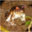

In [7]:
train_image[0]

In [8]:
train_image

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

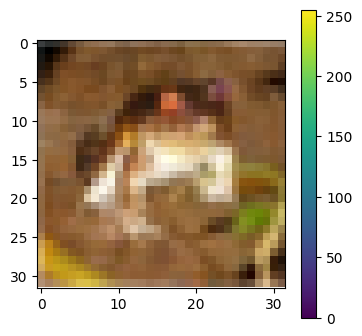

In [9]:
plt.figure(figsize=(4,4))
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
class_names = ['air plane','auto mobile','bird','cat','dear','dog','frog','horse','ship','truck']

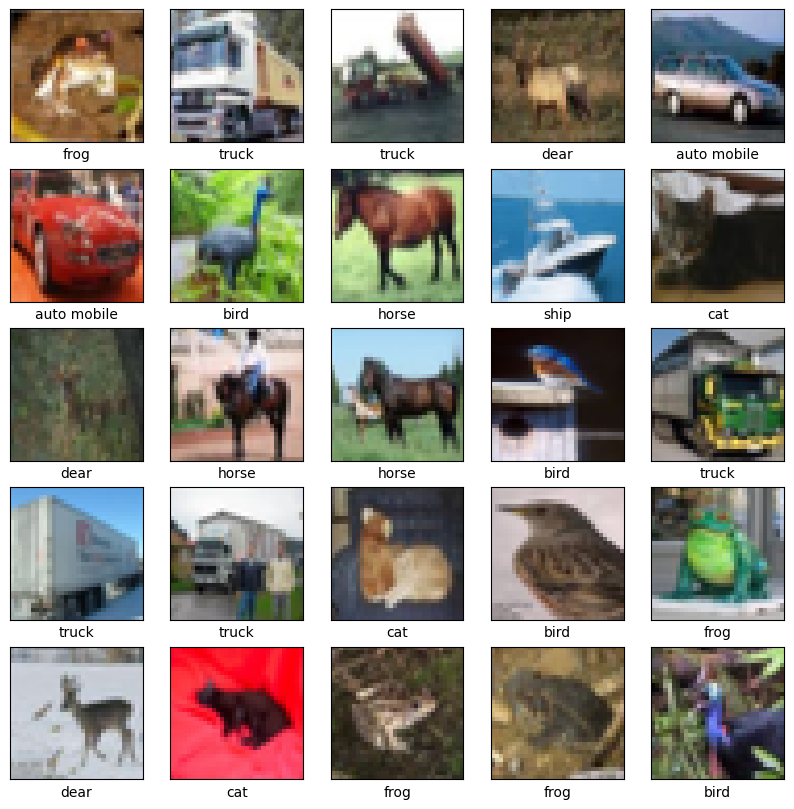

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):  # 25images
    plt.subplot(5,5,i+1) # 25 plots  i=2   5,5,2
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i])
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411146 (1.57 MB)
Trainable params: 411146 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from re import VERBOSE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
 model.fit(train_image,
           train_label,
           batch_size=64,
           verbose=True)

782/782 [==============================] - 7s 8ms/step - loss: 18.3192 - accuracy: 0.1937


In [22]:
test_loss,test_acc=model.evaluate(test_image,test_label)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.4631 - accuracy: 0.2394
0.2393999993801117


In [23]:
y_pred=model.predict(test_image)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[7.8038111e-02, 3.3601198e-01, 4.8347116e-03, ..., 9.7831283e-03,
        4.3069151e-01, 3.2036568e-03],
       [6.9753334e-02, 2.7131581e-01, 2.0981391e-04, ..., 9.3031929e-05,
        7.1405850e-02, 5.7370549e-01],
       [1.5583947e-01, 1.0153248e-01, 2.1136455e-05, ..., 3.6741706e-04,
        6.7016423e-01, 6.4613223e-02],
       ...,
       [3.5455880e-01, 3.7322622e-03, 1.3258331e-01, ..., 2.7111382e-03,
        2.8964467e-02, 2.7412442e-02],
       [3.0560272e-02, 2.1441104e-02, 7.8634815e-03, ..., 4.0999010e-02,
        5.1455088e-02, 9.8634847e-03],
       [4.1181117e-02, 4.5060702e-02, 3.5281195e-03, ..., 1.4742294e-01,
        1.9283888e-01, 1.1283378e-02]], dtype=float32)

In [24]:
sum = np.sum(y_pred[0])
max=np.max(y_pred[0])
sum,max

(1.0, 0.4306915)

In [26]:
y_pred[0]
max_prob=np.max(y_pred[0])
index=np.argmax(y_pred[0])
prediction_class=class_names[index]
Ground_Truth_class=class_names[test_label[0][0]]

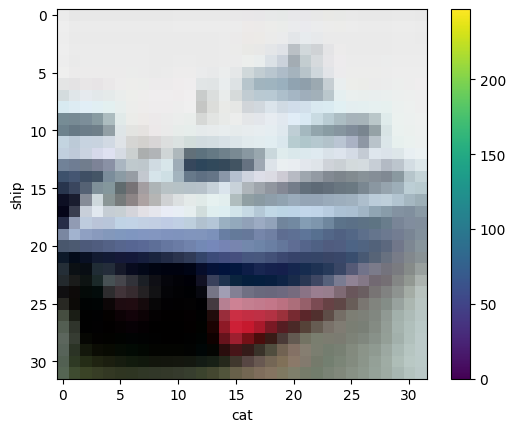

In [28]:
plt.figure()
plt.imshow(test_image[1])
plt.xlabel(Ground_Truth_class)
plt.ylabel(prediction_class)
plt.colorbar()
plt.show()

In [29]:
y_pred

array([[7.8038111e-02, 3.3601198e-01, 4.8347116e-03, ..., 9.7831283e-03,
        4.3069151e-01, 3.2036568e-03],
       [6.9753334e-02, 2.7131581e-01, 2.0981391e-04, ..., 9.3031929e-05,
        7.1405850e-02, 5.7370549e-01],
       [1.5583947e-01, 1.0153248e-01, 2.1136455e-05, ..., 3.6741706e-04,
        6.7016423e-01, 6.4613223e-02],
       ...,
       [3.5455880e-01, 3.7322622e-03, 1.3258331e-01, ..., 2.7111382e-03,
        2.8964467e-02, 2.7412442e-02],
       [3.0560272e-02, 2.1441104e-02, 7.8634815e-03, ..., 4.0999010e-02,
        5.1455088e-02, 9.8634847e-03],
       [4.1181117e-02, 4.5060702e-02, 3.5281195e-03, ..., 1.4742294e-01,
        1.9283888e-01, 1.1283378e-02]], dtype=float32)

In [33]:
import pandas as pd
max_prob=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
Ground_Truth_class=[class_names[i[0]] for i in test_label]

In [35]:
d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
                columns=['Max_prob','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

0.2394

In [36]:
#Ground_Truth_class

In [37]:
d1

,Max_prob,Index,Prediction_class,Ground_Truth_class,output
0,0.430692,8,ship,cat,0
1,0.573705,9,truck,ship,0
2,0.670164,8,ship,ship,1
3,0.455664,8,ship,air plane,0
4,0.247352,4,dear,frog,0
...,...,...,...,...,...
9995,0.635632,8,ship,ship,1
9996,0.522236,4,dear,cat,0
9997,0.354559,0,air plane,dog,0
9998,0.608170,4,dear,auto mobile,0
